## **Final Task** - Category prediction based on 'products.csv' data

##### **Author**: Danilo Jelovac
---
##### >>. **Goal**:
Our goal here is to chose the best performing model and train it so it will predict
product category based on the product itself with big precision. 

This notebook will show data analysis and preprocessing with in-depth analysis of 
the data and preparing it for ML process.
---
##### Requirements (if not on colab/jupyter lab):
- pandas
- matplotlib
- seaborn
- jupyter
- ipykernel


##### Step#1 - Importing libraries
---

In [ ]:
# ------------------------------------------
# Importing libraries required for this task:
# ------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --Confirmation message:

print(">. If you see this message - the libraries are uploaded successfuly!\n")

>. If you see this message - the libraries are uploaded successfuly!



##### Step#2 - Loading dataset
---
- This is the step where we check our dataframe, how it looks, it's size, datatypes etc...
From here on now we plan our next step!
---

==== SAMPLE PRESENTATION ====
------------------------------ 

>. Dataframe shape (rows, columns) -> (35311, 8)
>. Dataframe column names -> ['product ID', 'Product Title', 'Merchant ID', ' Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', ' Listing Date  ']

>. Sample of 5 rows:
------


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



>. Information:
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB
None

>. Number of NaNs:
------
- product ID -> 0
- Product Title -> 172
- Merchant ID -> 0
- Category Label -> 44
- Product Code -> 95
- Number of Views -> 14
- Merchant Rating -> 170
- Listing Date -> 59  
      

>. Checking on data types...
------
product ID           int64
Product Title       object
Merchant ID          int64
 Category Lab

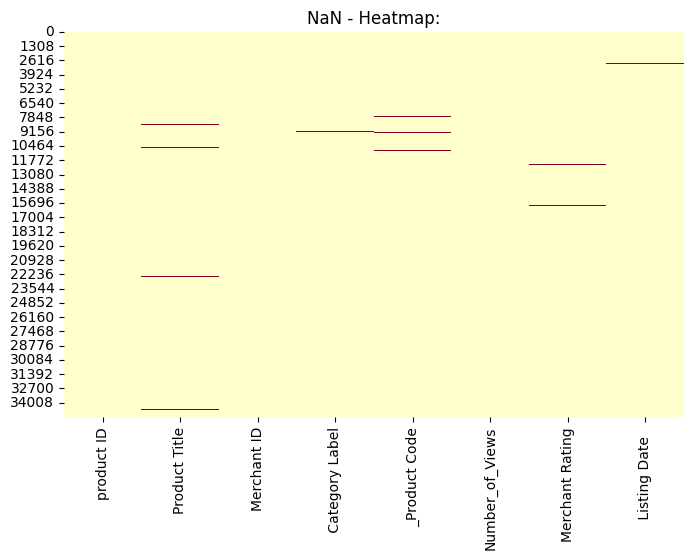


-----



In [155]:
# ----------------------------------------------
# Loading dataset, printing out samples and data:
# ----------------------------------------------


# ------------------------
FOLDER_NAME = "ml_data"
FILE_NAME = "products.csv"
# ------------------------


# --Loading the dataframe:

df = pd.read_csv(f"../{FOLDER_NAME}/{FILE_NAME}")

# --Samples presentation:

print("==== SAMPLE PRESENTATION ====")
print("-" * 30, "\n")

print(f">. Dataframe shape (rows, columns) -> {df.shape}")
print(f">. Dataframe column names -> {df.columns.to_list()}")

print("\n>. Sample of 5 rows:\n------")
display(df.head())

print("\n>. Information:\n------")
print(df.info())

print("\n>. Number of NaNs:\n------")
print(f"""- product ID -> {df['product ID'].isna().sum()}
- Product Title -> {df['Product Title'].isna().sum()}
- Merchant ID -> {df['Merchant ID'].isna().sum()}
- Category Label -> {df[' Category Label'].isna().sum()}
- Product Code -> {df['_Product Code'].isna().sum()}
- Number of Views -> {df['Number_of_Views'].isna().sum()}
- Merchant Rating -> {df['Merchant Rating'].isna().sum()}
- Listing Date -> {df[' Listing Date  '].isna().sum()}  
      """)

print("\n>. Checking on data types...\n------")
print(df.dtypes)

print("\n", "-" * 30, "\n")

plt.figure(figsize=(8, 5))
sns.heatmap(data=df.isna(), cbar=False, cmap="YlOrRd")
plt.title("NaN - Heatmap:")
plt.show()

print("\n-----\n")

##### Step#3 - Cleaning, preprocessing
---
- One graph was neccessary: the heatmap. It shows us that there are a few NaNs which we
can safely remove. Also, we see the incosistency in column names, which will be standardized.
---

In [156]:
# -------------------------------------------
# Cleaning, fixing, preparing df for analysis:
# -------------------------------------------


# --Cleaning the NaNs:
#   Since the dataframe is very large (~35k) and numbers of NaNs is rather small,
#   there is no reason to keep them and confuse our model.

cleaned_df = df.dropna()
print("\n>. Number of NaNs check:\n------")
print(cleaned_df.isna().sum())

# --Fixing column names:
#   They are very inconsistent with a lot of spaces and unnecesary characters.

cleaned_df.columns = (cleaned_df.columns.str.replace("_"," ").str.strip().str.lower().str.replace(" ", "_"))
print(f"\n>. Coulmns fix check -> {cleaned_df.columns.tolist()}")

print("\n", "-" * 30, "\n")


>. Number of NaNs check:
------
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64

>. Coulmns fix check -> ['product_id', 'product_title', 'merchant_id', 'category_label', 'product_code', 'number_of_views', 'merchant_rating', 'listing_date']

 ------------------------------ 



##### Step#4 - Further analysis
---
- This is a step where we analyze the data looking for answers. We also fix and preprocess anything
that show inconsistencies and may cause problems.
---


>. New dataframe: 


,product_title,category_label,product_code
0,apple iphone 8 plus 64gb silver,Mobile Phones,QA-2276-XC
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones,KA-2501-QO
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones,FP-8086-IE
3,apple iphone 8 plus 64gb space grey,Mobile Phones,YI-0086-US
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones,NZ-3586-WP



>. BFR | ['category_label'] values check:
------


category_label
Fridge Freezers     5424
Washing Machines    3971
Mobile Phones       3970
CPUs                3711
TVs                 3502
Fridges             3403
Dishwashers         3374
Digital Cameras     2661
Microwaves          2307
Freezers            2182
fridge               121
CPU                   81
Mobile Phone          53
Name: count, dtype: int64


>. AFT | ['category_label'] values check:
------


category_label
Fridge Freezers     11130
Mobile Phones        4023
Washing Machines     3971
CPUs                 3792
TVs                  3502
Dishwashers          3374
Digital Cameras      2661
Microwaves           2307
Name: count, dtype: int64

------


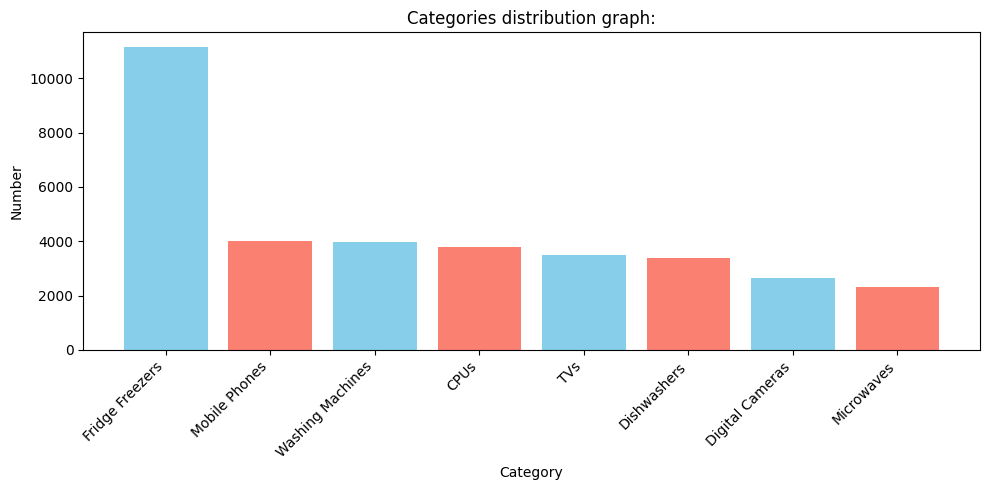

------

>. 'product_code' prefix compared to 'category_label':
------


category_label,CPUs,Digital Cameras,Dishwashers,Fridge Freezers,Microwaves,Mobile Phones,TVs,Washing Machines
product_code_prefix,,,,,,,,
AA,5,2,6,20,2,5,6,5
AB,11,3,6,14,1,4,6,5
AC,8,1,6,26,2,8,8,4
AD,6,6,2,14,3,6,5,7
AE,8,1,3,15,4,8,6,8
...,...,...,...,...,...,...,...,...
ZV,8,3,4,18,2,7,8,7
ZW,8,4,3,15,2,6,8,2
ZX,5,6,2,22,4,9,9,11


------


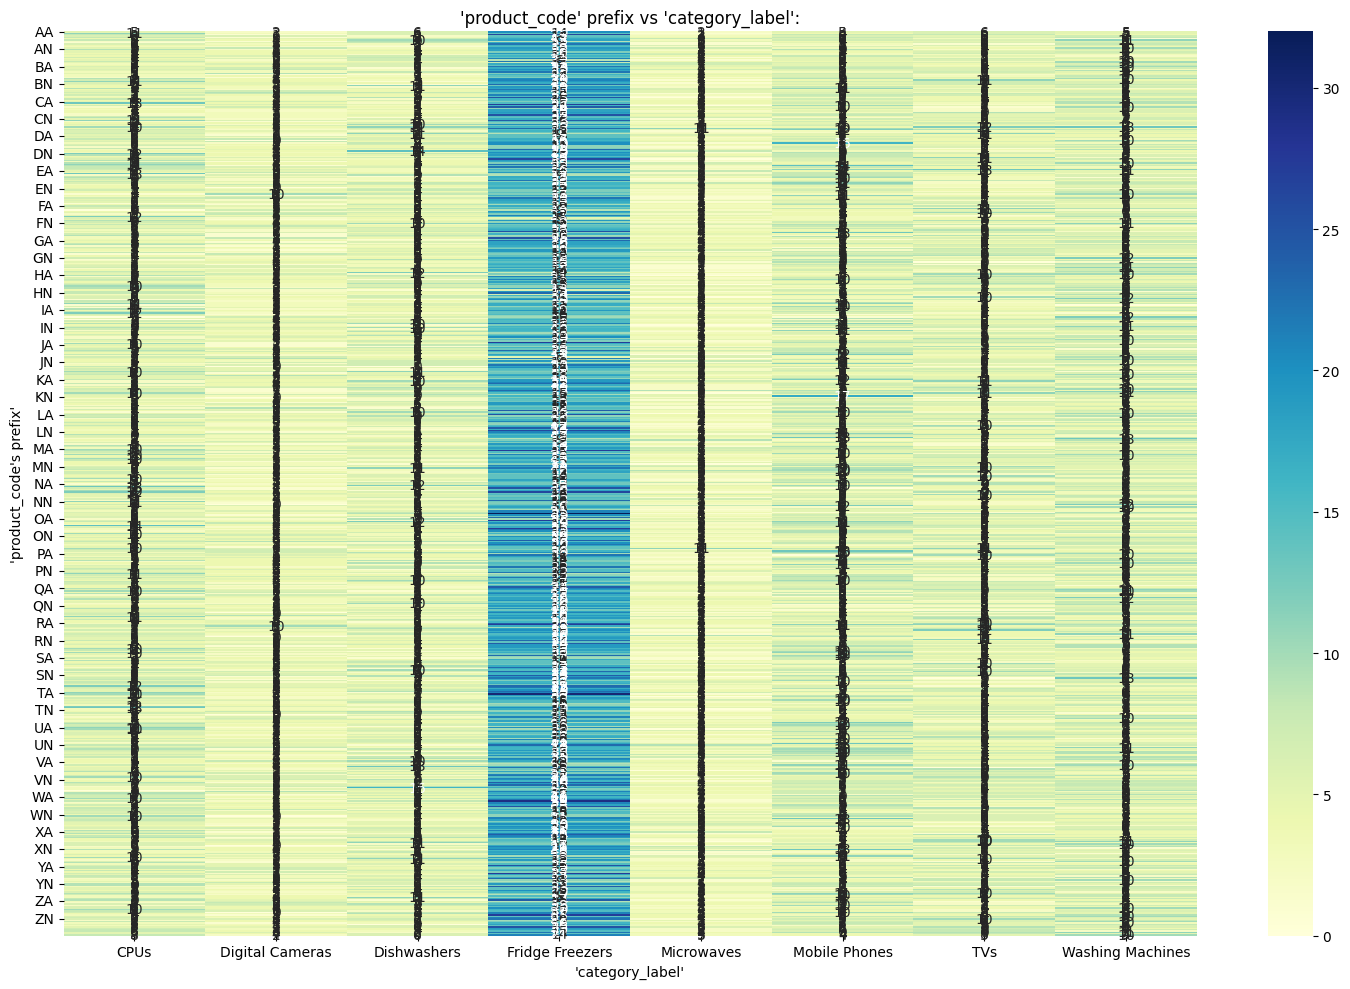

------

>. Completed dataframe: 


,product_title,category_label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones



 ------------------------------ 



In [157]:
# -----------------------------------------------
# Data analysis through visualization of the data:
# -----------------------------------------------


# --Removing the columns that has no possible impact on
#   category clasification of the products:

cleaned_df = cleaned_df.drop(columns=['product_id', 'merchant_id', 'number_of_views', 'merchant_rating', 'listing_date'])

print("\n>. New dataframe: ")
display(cleaned_df.head(5))

# --Analyzing 'product_code' column to see if it affects 'category_label':

cleaned_df['product_code_prefix'] = cleaned_df['product_code'].str[:2]

# --'category_label' values check:

print("\n>. BFR | ['category_label'] values check:\n------")
display(cleaned_df['category_label'].value_counts())

# --'category_label' values fix:

category_mapping = {
    "Fridges": "Fridge Freezers",
    "fridge": "Fridge Freezers",
    "Freezers": "Fridge Freezers",
    "Mobile Phone": "Mobile Phones",
    "CPU": "CPUs"
}
cleaned_df['category_label'] = cleaned_df['category_label'].astype(object).replace(category_mapping).astype('category')

# --'category_label' values re-check:

print("\n>. AFT | ['category_label'] values check:\n------")
display(cleaned_df['category_label'].value_counts())

# --'category_label' values display:

print("------")

number_of_categories = cleaned_df['category_label'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(number_of_categories.index, number_of_categories.values, color=['skyblue', 'salmon'])
plt.title("Categories distribution graph:")
plt.xlabel("Category")
plt.ylabel("Number")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("------")

# --prefix v. category:

prefix_v_category = pd.crosstab(cleaned_df['product_code_prefix'], cleaned_df['category_label'])
print("\n>. 'product_code' prefix compared to 'category_label':\n------")
display(prefix_v_category)

print("------")

plt.figure(figsize=(15, 10))
sns.heatmap(prefix_v_category, annot=True, fmt="d", cmap="YlGnBu")
plt.title("'product_code' prefix vs 'category_label':")
plt.xlabel("'category_label'")
plt.ylabel("'product_code's prefix'")
plt.tight_layout()
plt.show()

print("------")

# --removing 'product_code':

cleaned_df = cleaned_df.drop(columns=['product_code', 'product_code_prefix'])

print("\n>. Completed dataframe: ")
display(cleaned_df.head(5))


print("\n", "-" * 30, "\n")

##### Step#5 - Saving the cleaned dataframe
---
- Since we realized, using general logic and data analysis, that no data other than product_title 
show any significance regarding labeling the categories, we safely removed everything leaving us
with clean dataset, ML ready, to be saved. 

In [158]:
# ------------------------
# Saving cleaned dataframe:
# ------------------------


# -----------------------------------
NEW_FILE_NAME = "products_cleaned.csv"
# -----------------------------------


try:
    cleaned_df.to_csv(f"../{FOLDER_NAME}/{NEW_FILE_NAME}")
    print(f"\n>>. File '{NEW_FILE_NAME}' successfuly saved in '{FOLDER_NAME}' folder.")
except Exception:
    print("\n>>. Something went wrong and file cannot be saved...")
    

    
    


>>. File 'products_cleaned.csv' successfuly saved in 'ml_data' folder.
